In [1]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [2]:
import pandas as pd 
df = pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df.shape

(50, 5)

In [4]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


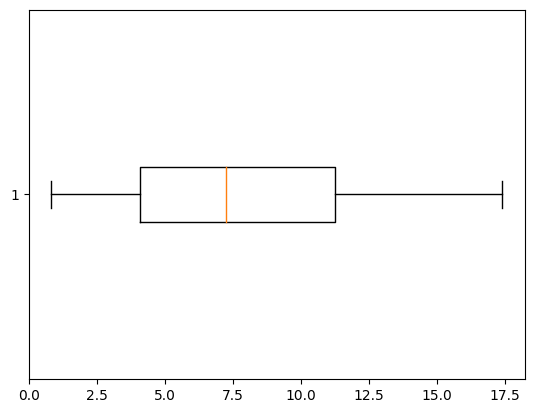

In [6]:
# Box plot
import matplotlib.pyplot as plt
plt.boxplot(df["Murder"],vert=False)
plt.show()

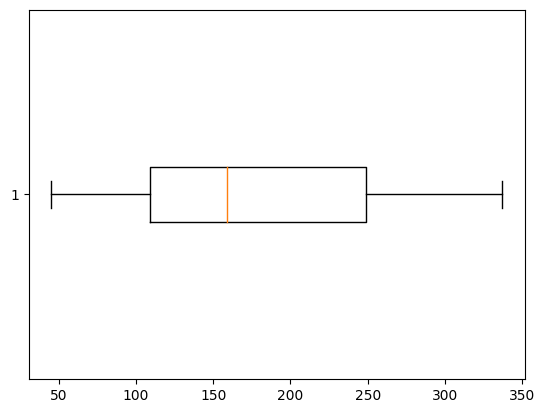

In [7]:
plt.boxplot(df["Assault"],vert=False)
plt.show()

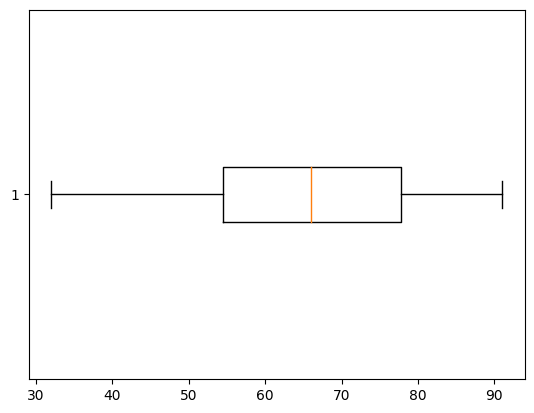

In [8]:
plt.boxplot(df["UrbanPop"],vert=False)
plt.show()

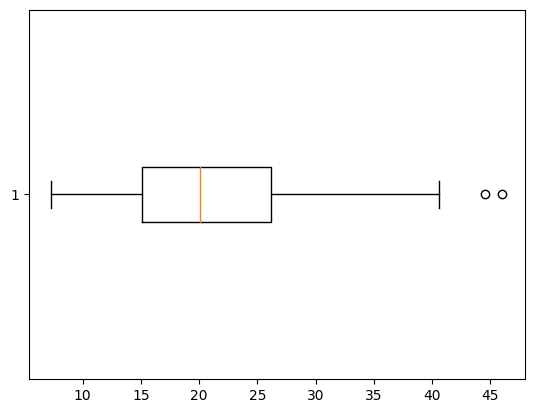

In [9]:
plt.boxplot(df["Rape"],vert=False)
plt.show()

In [10]:
import numpy as np
Q1 = np.percentile(df['Rape'],25)
Q3 = np.percentile(df['Rape'],75)
IQR = Q3 - Q1
LW = Q1 - (1.5*IQR)
UW = Q3 + (1.5*IQR)
df[(df["Rape"] < LW) | (df["Rape"]> UW)]
len(df[(df["Rape"] < LW) | (df["Rape"]> UW)])


2

In [11]:
# therefore 2 outliers
df["Rape"].copy()[df["Rape"] > UW] = df["Rape"].median()
df["Rape"].copy()[df["Rape"] < LW] = df["Rape"].median()
X = df.iloc[:,1:]


In [12]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [13]:
# Standardization of data 
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)
X = pd.DataFrame(X)


In [14]:
X.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [15]:
#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete")
Y = cluster.fit_predict(X)
Y = pd.DataFrame(Y,columns=["cluster"])
Y.value_counts()
new_data = pd.concat([df,Y],axis=1)
new_data

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [16]:
#  new_data to any classifier techniques for making model

########   KMeans  #######
from sklearn.cluster import KMeans
KM = KMeans()

inertia = []
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(X)
    inertia.append(KM.inertia_)

print("Inertia - ",inertia)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia -  [200.00000000000003, 104.96163315756871, 80.0888613219962, 57.55425863091105, 50.52026552535068, 43.927464044975736, 40.52183461131976, 34.68738839784909, 32.70648136388185, 28.311639397122548]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

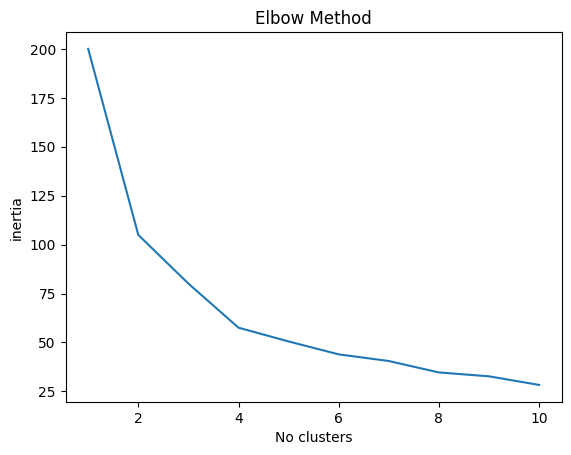

In [18]:
# Elbow Method


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.plot(range(1,11),inertia)
plt.title("Elbow Method")
plt.xlabel("No clusters")
plt.ylabel("inertia")
plt.show()


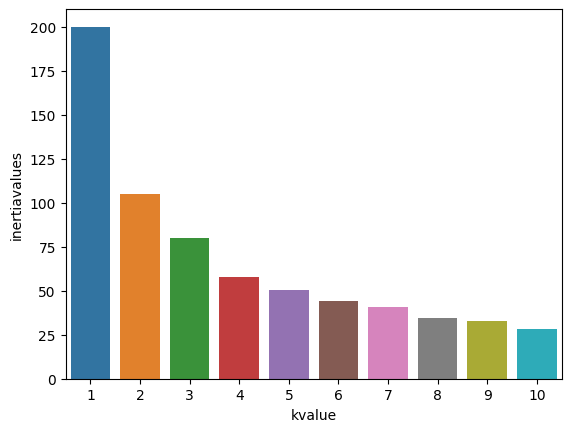

In [19]:
# scree plot
import seaborn as sns
d1 = {"kvalue":range(1,11),"inertiavalues":inertia}
d2 = pd.DataFrame(d1)
sns.barplot(x="kvalue",y="inertiavalues",data= d2,)
plt.show()

In [20]:
# Elbow mehtod and screen plot i have decided that 4 clusters the best for this data set

KM = KMeans(n_clusters=4, n_init=30)
Y = KM.fit_predict(X)
Y
Y = pd.DataFrame(Y,columns=["cluster1"])
Y
new_data = pd.concat([df,Y],axis=1)
new_data 


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster1
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [21]:
# new_data to any classifier techniques for making model
########## DBSCAN ###########

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=3)
dbscan.fit_predict(X)
Y = dbscan.labels_
Y =pd.DataFrame(Y,columns=["cluster2"])
Y.value_counts()
clustering = pd.concat([df,Y],axis=1)
clustering 

noise_data = clustering[clustering["cluster2"]==-1]
noise_data 

final_data = clustering[clustering["cluster2"]!=-1]
final_data 

# outliers are removed from the final_data and  final_data used for other clustering techniques 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster2
0,Alabama,13.2,236,58,21.2,0
6,Connecticut,3.3,110,77,11.1,1
9,Georgia,17.4,211,60,25.8,0
11,Idaho,2.6,120,54,14.2,1
12,Illinois,10.4,249,83,24.0,2
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
17,Louisiana,15.4,249,66,22.2,0
